In [1]:
# Introducción a ML
# Capacitador: David Allende Quintana
# david.allende@outlook.com
# Versión: 1.0

# Linear Regression

Librerías necesarias

In [2]:
%matplotlib inline
import numpy as np
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt
from sklearn import linear_model,cross_validation, feature_selection,preprocessing
import statsmodels.formula.api as sm
from statsmodels.tools.eval_measures import mse
from statsmodels.tools.tools import add_constant
from sklearn.metrics import mean_squared_error

## Simple Linear Regression

Los datos a continuación contienen la altura y el peso de un grupo de hombres.

In [3]:
sl_data = pd.read_csv('Data/Mens_height_weight.csv')

Veamos un gráfico de dispersión y entendamos la relación entre ellos.

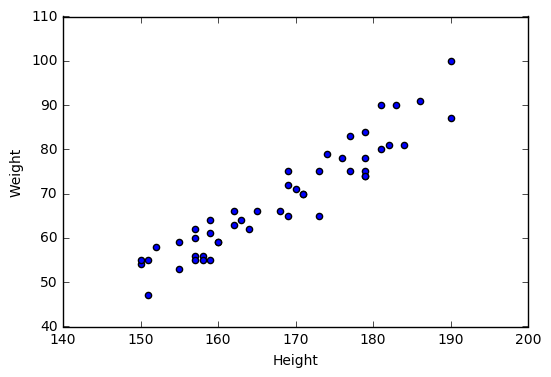

In [4]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(sl_data['Height'],sl_data['Weight'])
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()


In [5]:
sl_data.corr()

,Height,Weight
Height,1.000000,0.942603
Weight,0.942603,1.000000


Peso = Variable Dependiente.

Altura = Variable Independiente.

In [14]:
sl_data.columns[0]

'Height'

In [12]:
lm.coef_

array([ 1.00092142])

In [17]:
# Create linear regression object
lm = linear_model.LinearRegression()

# Train the model using the training sets
lm.fit(sl_data.Height[:,np.newaxis], sl_data.Weight)


print ('El intercepto es ' + str(lm.intercept_) + '\n')

print ('El coeficiente de la Altura ' + str(lm.coef_) + '\n')

#pd.DataFrame(zip(sl_data.columns,lm.coef_), columns = ['features', 'estimatedCoefficients'])



El intercepto es -99.2772096063

El coeficiente de la Altura [ 1.00092142]



Plotting the regression line on the previous scatter plot

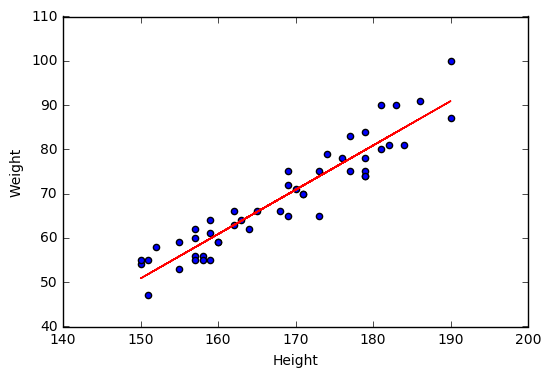

In [18]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(sl_data.Height,sl_data.Weight)
ax.plot(sl_data.Height,lm.predict(sl_data.Height[:, np.newaxis]), color = 'red')
ax.set_xlabel('Height')
ax.set_ylabel('Weight')
plt.show()


## Multiple Regression

Los datos de los jugadores de la NBA.

1. height = Altura de los jugadores
2. weight = Peso de los jugadores
3. success_field_goals = Porcentaje de los partidos exitosos
4. success_free_throws = Porcentaje de tiros libres exitosos
5. avg_points_scored = promedio de puntos por partido

In [19]:
b_data = pd.read_csv('Data/basketball.csv')

b_data.describe()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
count,54.000000,54.000000,54.000000,54.000000,54.000000
mean,6.587037,209.907407,0.449111,0.741852,11.790741
std,0.458894,30.265036,0.056551,0.100146,5.899257
min,5.700000,105.000000,0.291000,0.244000,2.800000
25%,6.225000,185.000000,0.415250,0.713000,8.150000
50%,6.650000,212.500000,0.443500,0.753500,10.750000
75%,6.900000,235.000000,0.483500,0.795250,13.600000
max,7.600000,263.000000,0.599000,0.900000,27.400000


In [21]:
df_corr = b_data.corr().unstack()
df_corr = df_corr[df_corr<1]
df_corr.sort_values(ascending=False)
df_corr

height               weight                 0.834324
                     success_field_goals    0.495546
                     success_free_throws   -0.259271
                     avg_points_scored     -0.068906
weight               height                 0.834324
                     success_field_goals    0.516051
                     success_free_throws   -0.290159
                     avg_points_scored     -0.009844
success_field_goals  height                 0.495546
                     weight                 0.516051
                     success_free_throws   -0.018570
                     avg_points_scored      0.338760
success_free_throws  height                -0.259271
                     weight                -0.290159
                     success_field_goals   -0.018570
                     avg_points_scored      0.244852
avg_points_scored    height                -0.068906
                     weight                -0.009844
                     success_field_goals    0.

Veamos la relación de la variable dependiente (promedio de puntos por partido) con las otras variables explicativas.

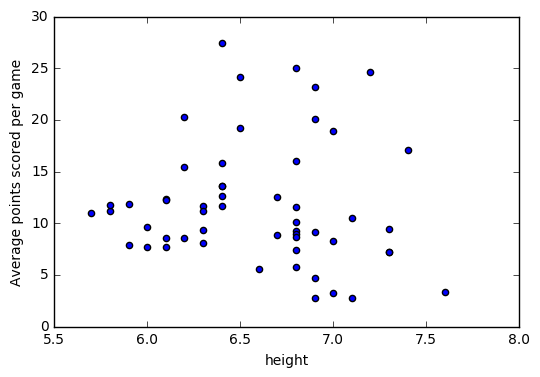

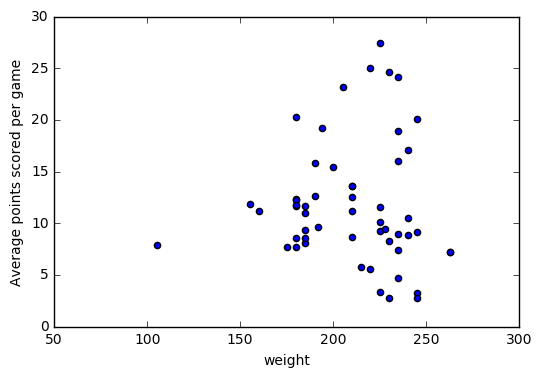

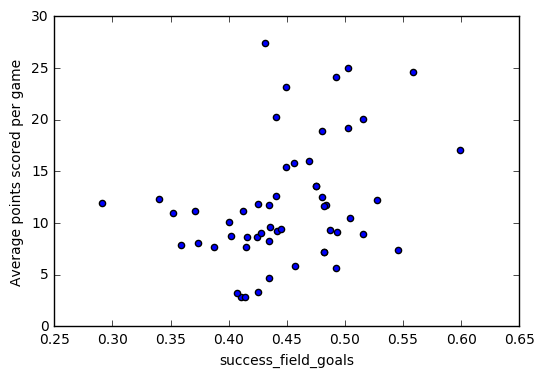

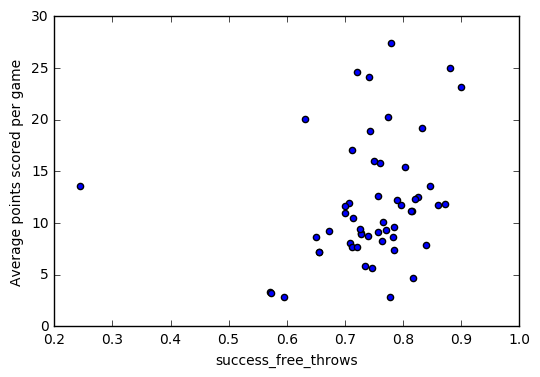

In [22]:
X_columns = b_data.columns[:-1]

for i in X_columns:
    fig, ax = plt.subplots(1, 1)  
    ax.scatter(b_data[i], b_data.avg_points_scored)
    ax.set_xlabel(i)
    ax.set_ylabel('Average points scored per game')
    plt.show()

Matriz de correlaciones

In [23]:
b_data.corr()

,height,weight,success_field_goals,success_free_throws,avg_points_scored
height,1.000000,0.834324,0.495546,-0.259271,-0.068906
weight,0.834324,1.000000,0.516051,-0.290159,-0.009844
success_field_goals,0.495546,0.516051,1.000000,-0.018570,0.338760
success_free_throws,-0.259271,-0.290159,-0.018570,1.000000,0.244852
avg_points_scored,-0.068906,-0.009844,0.338760,0.244852,1.000000


Usaremos dos partes (entrenamiento y testeo).

In [24]:
X = b_data.values.copy() 
X_train, X_valid, y_train, y_valid = cross_validation.train_test_split( X[:, :-1], X[:, -1], train_size=0.80)

Generamos un Modelo Lineal

In [25]:
result = sm.OLS( y_train, add_constant(X_train) ).fit()
result.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.206
Model:                            OLS   Adj. R-squared:                  0.123
Method:                 Least Squares   F-statistic:                     2.471
Date:                Thu, 02 Mar 2017   Prob (F-statistic):             0.0609
Time:                        14:19:10   Log-Likelihood:                -131.31
No. Observations:                  43   AIC:                             272.6
Df Residuals:                      38   BIC:                             281.4
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const          7.6670     16.916      0.453      0.653       -26.577    41.911
x1            -4.3364      4.133     -1.049      0.301       -12.704     4.031
x2             0.0166      0.068      0.244      0.808        -0.121     0.155
x3            53.8097     18.505      2.908      0.006        16.349    91.270
x4             6.6614      8.788      0.758      0.453       -11.129    24.451
==============================================================================
Omnibus:                        7.548   Durbin-Watson:                   2.366
Prob(Omnibus):                  0.023   Jarque-Bera (JB):                6.575
Skew:                           0.924   Prob(JB):                       0.0373
Kurtosis:                       3.502   Cond. No.                     4.74e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.74e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

La tercera variable es la única significativa.

In [26]:
result_alternate = sm.OLS( y_train, add_constant(X_train[:,2]) ).fit()
result_alternate.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.112
Method:                 Least Squares   F-statistic:                     6.290
Date:                Thu, 02 Mar 2017   Prob (F-statistic):             0.0162
Time:                        14:23:44   Log-Likelihood:                -133.21
No. Observations:                  43   AIC:                             270.4
Df Residuals:                      41   BIC:                             273.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
const         -6.0298      7.284     -0.828      0.413       -20.741     8.681
x1            39.9213     15.917      2.508      0.016         7.776    72.067
==============================================================================
Omnibus:                        7.623   Durbin-Watson:                   2.501
Prob(Omnibus):                  0.022   Jarque-Bera (JB):                6.544
Skew:                           0.904   Prob(JB):                       0.0379
Kurtosis:                       3.617   Cond. No.                         23.0
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Usemos la data de test para probar el modelo.

In [29]:
ypred = result.predict(add_constant(X_valid))
print (mse(ypred,y_valid))

ypred_alternate = result_alternate.predict(add_constant(X_valid[:, 2]))
print (mse(ypred_alternate,y_valid))


29.2290149042
36.5032567682


Lets see the actual vs predicted for the 1st model

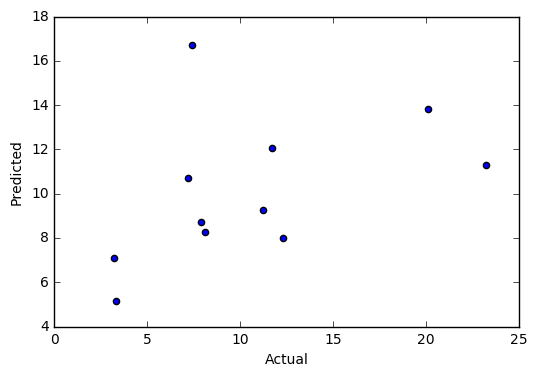

In [30]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(y_valid, ypred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

Usando el nuevo modelo

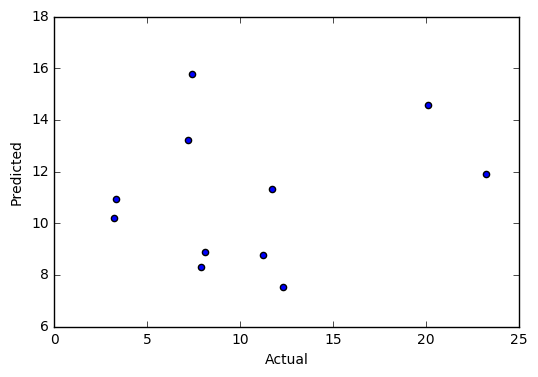

In [31]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(y_valid, ypred_alternate)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()

In [33]:
zip(b_data.columns,lm.coef_)

In [36]:
# Create linear regression object
lm = linear_model.LinearRegression()

# Train the model using the training sets
lm.fit(X_train, y_train)

print ('Intercept is ' + str(lm.intercept_) + '\n')
print ('Los coeficientes ' + str(lm.coef_) + '\n')

b_data.columns

#pd.DataFrame(zip(b_data.columns,lm.coef_), columns = ['features', 'estimatedCoefficients'])

Intercept is 7.66701454289

Los coeficientes [ -4.33640739e+00   1.66494634e-02   5.38097070e+01   6.66144724e+00]



Index(['height', 'weight', 'success_field_goals', 'success_free_throws',
       'avg_points_scored'],
      dtype='object')

Lets see how is the R square

In [38]:
cross_validation.cross_val_score(lm, X_train, y_train, scoring='r2')

array([ 0.14309334, -0.24916927, -0.19736716])

Lets predict the on the test data

In [40]:
ypred = lm.predict(X_valid)

mean_squared_error(ypred,y_valid)

29.22901490421258

Plotting the predicted vs the actual

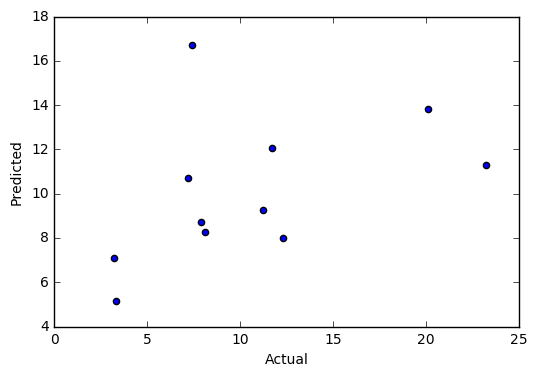

In [41]:
fig, ax = plt.subplots(1, 1)  
ax.scatter(y_valid, ypred)
ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
plt.show()